# Pensamiento probabilistico - Variables Continuas
## Funciones de densidad de probabilidad 
### Adrián Vázquez 
#### 20/05/21

<b>PDF : </b> Función de densidad de probabilidad
- Este es analogo continuo a la función de masa de probabilidad el PMF
- Describe las posibilidades de observar un valor de una variable continua
- Las areas debajo del PDF dan probsbilidades 

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## PDF Normal

In [ ]:
Ejemplo 

AttributeError: 'Polygon' object has no property 'normed'

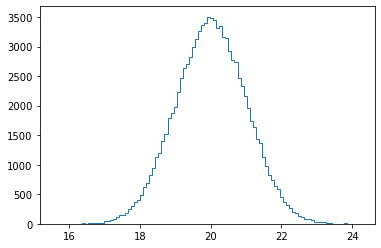

In [10]:
 # 3 distribuciones con un tamaño de n = 100000, con diferentes desviaciones
muestra_stan1 = np.random.normal(20, 1, size=100000)
muestra_stan3= np.random.normal(20, 3, size=100000)
muestra_stan10 = np.random.normal(20, 10, size=100000)
# Graficando cada distribucion normal
_ = plt.hist(muestra_stan1 , bins=100, normed=True, histtype='step')
_ = plt.hist(muestra_stan3, bins=100, normed=True, histtype='step')
_ = plt.hist(muestra_stan10, bins=100, normed=True, histtype='step')
# Etiquetas
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

## CDF Normal

In [11]:
#utilizaremos la funcion  ecdf
# Función para calcular un ECDF: devuelve x y y del ECDF
import numpy as np 
def ecdf(datos): 
    n = len(datos) #<------ Numero de puntos de datos
    x = np.sort(datos) #<----- ordena los datos 
    y = np.arange(1, len(x) + 1)/n #<------ datos especificamos uniformemente con maximo de uno 
    return x, y  #<--------- Regresar valores para x y y



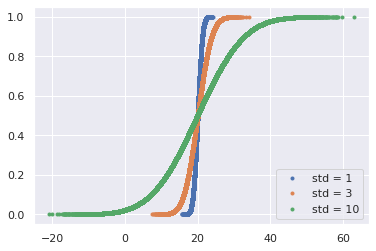

In [13]:
# Generate CDFs
x_std1, y_std1  = ecdf(muestra_stan1)
x_std3, y_std3  = ecdf(muestra_stan3)
x_std10, y_std10  = ecdf(muestra_stan10)
# Plot CDFs
sns.set()
_ = plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
_ = plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
_ = plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

<b>Conclusión : </b>
- Todas las CDFS pasan por la media en el percentil 50; la media y la mediana de una distribución normal son iguales. La anchura de el CDF varía con la desviación estándar

### Distribución normal: 
- ¿Se distribuyen normalmente los resultados de los Belmont Stakes? Desde 1926, los Belmont Stakes son una carrera de 1,5 millas de caballos purasangre de 3 años. Secretariat corrió el Belmont Stakes más rápido de la historia en 1973. Mientras que ese fue el año más rápido, 1970 fue el más lento debido a unas condiciones inusualmente húmedas y descuidadas. Una vez eliminados estos dos valores atípicos del conjunto de datos, calcula la media y la desviación estándar de los tiempos de los ganadores del Belmont. Tome una muestra de una distribución normal con esta media y desviación estándar utilizando la función np.random.normal() y trace el CDF. Superponga la ECDF de los tiempos de los ganadores del Belmont. 
- ¿Están cerca de la distribución normal?



In [19]:
# arreglo de datos para el ejercicio
caballos = [ 148.51,   146.65, 148.52, 150.7,  150.42, 150.88, 151.57, 147.54, 149.65, 148.74,
 147.86, 148.75, 147.5,  148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82,
 148.96, 152.02, 146.82, 149.97, 146.13, 148.1,  147.2,  146.,   146.4,  148.2,
 149.8,  147.,   147.2,  147.8,  148.2,  149.,   149.8,  148.6,  146.8,  149.6,
 149.,   148.2,  149.2,  148.,   150.4,  148.8, 147.2,  148.8,  149.6,  148.4,
 148.4,  150.2,  148.8,  149.2,  149.2,  148.4,  150.2,  146.6,  149.8,  149.,
 150.8, 148.6,  150.2,  149.,   148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
 152.2,  148.2,  149.2,  151.,   149.6,  149.6,  149.4,  148.6,  150.,   150.6,
 149.2,  152.6,  152.8,  149.6,  151.6,  152.8,  153.2,  152.4,  152.2 ]

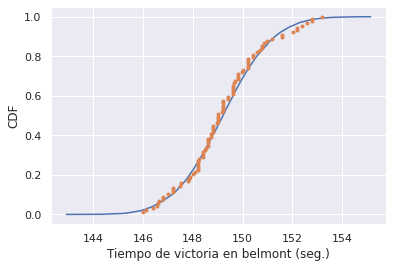

In [24]:
# Ejercicio 
#culamos la media y la desviación de los datos 
mu = np.mean(caballos)
sigma = np.std(caballos)

#Muestra de una distribución normal con mu y sigma
muestra = np.random.normal(mu, sigma, size = 10000)

#obtenemos el CDF de la muestra y del arreglo 
x_teoria, y_teoria = ecdf(muestra)
x, y = ecdf(caballos)

#graficando 
_ = plt.plot(x_teoria,  y_teoria)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Tiempo de victoria en belmont (seg.)')
_ = plt.ylabel('CDF')
plt.show()

<b> CONCLUSIÓN : </b>
- La CDF teórica y la ECDF de los datos sugieren que los tiempos de los ganadores de Belmont están, efectivamente, distribuidos normalmente. Esto también sugiere que en los últimos 100 años, aproximadamente, no ha habido grandes avances tecnológicos o de entrenamiento que hayan afectado significativamente a la velocidad a la que los caballos pueden correr esta carrera.


- ¿Cuál es la probabilidad de que un caballo iguale o supere el récord de Secretariat?Suponiendo que los tiempos de los ganadores del Belmont tienen una distribución normal (eliminando los años 1970 y 1973), ¿cuál es la probabilidad de que el ganador de un Belmont Stakes determinado lo corra tan rápido o más que Secretariat?

In [25]:
# Tomando un millon de muestras para una distribución normal
# misma mu y sigma 
muestra_2 = np.random.normal(mu, sigma, size = 1000000)
#calculo de la fracción de probabilidad, aquellos que son mas  o igual a 144 seg.
prob = np.sum(muestra_2 <= 144) / len(muestra_2)

#Resultado
print('La probabilidad de superar al otro : ' ,prob)

La probabilidad de superar al otro :  0.000649


<b> CONCLUSIÓN :</b>
- Tuvimos que tomar un millón de muestras porque la probabilidad de un tiempo rápido es muy baja y teníamos que asegurarnos de tomar suficientes muestras. Obtenemos que sólo hay un 0,06% de posibilidades de que un caballo corra el Belmont tan rápido como Secretariat.